<a href="https://colab.research.google.com/github/trailmarkerlib/policeProjectPythonWorkshop/blob/main/python_workshop_police_arrest_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grief to Aciton Python Workshop: Jan 17, 2024

## Pittsburgh Police Arrest Data
Data</br>
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True<br/><br/>
Data Dictionary</br>
https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True

## Objectives of this Notebook

After reviewing this notebook, you will establish a foundation for further learning and exploration of the following concepts

*   Common Python packages
*   Reading data using an API and from a CSV file
*   Exploring and aggregating data
*   Creating a new variable
*   Restructuring data


## Import packages

https://learnpython.com/blog/python-libraries-for-beginners/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
import json
import requests

## Read the data using WPRDC API

In [ ]:
url = 'https://data.wprdc.org/api/3/action/datastore_search?resource_id=e03a89dd-134a-4ee8-a2bd-62c40aeebc6f'

In [ ]:
data = json.loads(requests.get(url).text)

In [ ]:
#data

In [ ]:
pd.json_normalize(data)

,help,success,result.include_total,result.limit,result.records_format,result.resource_id,result.total_estimation_threshold,result.records,result.fields,result._links.start,result._links.next,result.total,result.total_was_estimated
0,https://data.wprdc.org/api/3/action/help_show?...,True,True,100,objects,e03a89dd-134a-4ee8-a2bd-62c40aeebc6f,None,"[{'_id': 1, 'PK': '1975272', 'CCR': '16158872'...","[{'id': '_id', 'type': 'int'}, {'id': 'PK', 't...",/api/3/action/datastore_search?resource_id=e03...,/api/3/action/datastore_search?resource_id=e03...,65776,False


In [ ]:
data['result']['records'][0:3]

[{'_id': 1,
  'PK': '1975272',
  'CCR': '16158872',
  'AGE': 42,
  'GENDER': 'F',
  'RACE': 'B',
  'ARRESTTIME': '2016-08-24T12:20:00',
  'ARRESTLOCATION': '4700 Block Centre AV Pittsburgh, PA 15213',
  'OFFENSES': '3929 Retail Theft.',
  'INCIDENTLOCATION': '4700 Block Centre AV Pittsburgh, PA 15213',
  'INCIDENTNEIGHBORHOOD': 'Bloomfield',
  'INCIDENTZONE': '5',
  'INCIDENTTRACT': '804',
  'COUNCIL_DISTRICT': '8',
  'PUBLIC_WORKS_DIVISION': '2',
  'X': -79.94927741,
  'Y': 40.45255125},
 {'_id': 2,
  'PK': '1974456',
  'CCR': '16144120',
  'AGE': 31,
  'GENDER': 'M',
  'RACE': 'W',
  'ARRESTTIME': '2016-08-03T14:55:00',
  'ARRESTLOCATION': '4200 Block Steubenville PKE Pittsburgh, PA 15205',
  'OFFENSES': '13(a)(16) Possession of Controlled Substance',
  'INCIDENTLOCATION': '4200 Block Steubenville PKE Pittsburgh, PA 15205',
  'INCIDENTNEIGHBORHOOD': 'Outside City',
  'INCIDENTZONE': 'OSC',
  'INCIDENTTRACT': '5599',
  'COUNCIL_DISTRICT': None,
  'PUBLIC_WORKS_DIVISION': None,
  'X': 

In [ ]:
pd.json_normalize(data['result']['records'])

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804,8,2,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599,None,None,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811,9,2,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304,1,1,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814,2,5,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1975358,16162854,35.0,M,B,2016-08-29T23:33:00,"700 Block Brushton AV Pittsburgh, PA 15221",13(a)(16) Possession of Controlled Substance /...,"700 Block Brushton AV Pittsburgh, PA 15221",Homewood South,5,1304,9,2,-79.888741,40.453675
96,97,1974535,16145596,25.0,F,B,2016-08-05T15:26:00,"5800 Block Forward AV Pittsburgh, PA 15217",13(a)(16) Possession of Controlled Substance /...,"5800 Block Forward AV Pittsburgh, PA 15217",Squirrel Hill South,4,1408,5,3,-79.923357,40.429595
97,98,1974941,16155030,34.0,M,W,2016-08-18T22:46:00,"lamar ST & Williams RD Pittsburgh, PA 15212",13(a)(16) Possession of Controlled Substance,"lamar ST & Williams RD Pittsburgh, PA 15212",Northview Heights,1,2609,1,1,-79.997696,40.474594
98,99,1974954,16091081,20.0,M,B,2016-09-07T01:30:00,"900 Block 2ND AV Pittsburgh, PA 15219",2706 Terroristic Threats. / 2701(a)(3) Simple ...,"2600 Block Centre AV Pittsburgh, PA 15219",Terrace Village,2,510,6,3,-79.968417,40.446533


In [ ]:
df_from_api = pd.json_normalize(data['result']['records'])

In [ ]:
df_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    100 non-null    int64  
 1   PK                     100 non-null    object 
 2   CCR                    100 non-null    object 
 3   AGE                    98 non-null     float64
 4   GENDER                 100 non-null    object 
 5   RACE                   100 non-null    object 
 6   ARRESTTIME             100 non-null    object 
 7   ARRESTLOCATION         100 non-null    object 
 8   OFFENSES               100 non-null    object 
 9   INCIDENTLOCATION       100 non-null    object 
 10  INCIDENTNEIGHBORHOOD   97 non-null     object 
 11  INCIDENTZONE           100 non-null    object 
 12  INCIDENTTRACT          97 non-null     object 
 13  COUNCIL_DISTRICT       92 non-null     object 
 14  PUBLIC_WORKS_DIVISION  92 non-null     object 
 15  X      

## Read the data from downloaded CSV file

In [ ]:
csv_url = 'https://raw.githubusercontent.com/trailmarkerlib/pythonWorkshop/main/data/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv'

In [ ]:
df_from_csv = pd.read_csv(csv_url)

<ipython-input-12-92457aacf929>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_from_csv = pd.read_csv(csv_url)


In [ ]:
df_from_csv = pd.read_csv(csv_url, low_memory = False)

In [ ]:
df_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65659 entries, 0 to 65658
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    65659 non-null  int64  
 1   PK                     65659 non-null  int64  
 2   CCR                    65659 non-null  int64  
 3   AGE                    65256 non-null  float64
 4   GENDER                 65659 non-null  object 
 5   RACE                   65659 non-null  object 
 6   ARRESTTIME             65659 non-null  object 
 7   ARRESTLOCATION         65659 non-null  object 
 8   OFFENSES               65656 non-null  object 
 9   INCIDENTLOCATION       65659 non-null  object 
 10  INCIDENTNEIGHBORHOOD   63199 non-null  object 
 11  INCIDENTZONE           65559 non-null  object 
 12  INCIDENTTRACT          63222 non-null  float64
 13  COUNCIL_DISTRICT       55592 non-null  float64
 14  PUBLIC_WORKS_DIVISION  55592 non-null  float64
 15  X 

## Choose data to explore and make a copy

In [ ]:
df = df_from_csv.copy()

In [ ]:
df.columns

Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [ ]:
df.columns.to_list()

['_id',
 'PK',
 'CCR',
 'AGE',
 'GENDER',
 'RACE',
 'ARRESTTIME',
 'ARRESTLOCATION',
 'OFFENSES',
 'INCIDENTLOCATION',
 'INCIDENTNEIGHBORHOOD',
 'INCIDENTZONE',
 'INCIDENTTRACT',
 'COUNCIL_DISTRICT',
 'PUBLIC_WORKS_DIVISION',
 'X',
 'Y']

In [ ]:
df.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


### Explore the data

#### Display the number of unique values and/or a list of unique values

In [ ]:
df['PK'].nunique()

65659

In [ ]:
df['INCIDENTLOCATION'].nunique()

13566

In [ ]:
df['GENDER'].unique()

array(['F', 'M', 'U'], dtype=object)

In [ ]:
df['RACE'].unique()

array(['B', 'W', 'H', 'O', 'U', 'A', 'I'], dtype=object)

In [ ]:
df['AGE'].unique()

array([ 42.,  31.,  63.,  25.,  45.,  29.,  21.,  17.,  14.,  30.,  54.,
        27.,  53.,  18.,  22.,  23.,  33.,  41.,  26.,  15.,  35.,  32.,
        13.,  19.,  52.,  40.,  16.,  20.,  28.,  nan,  36.,  37.,  44.,
        24.,  57.,  48.,  34.,  47.,  49.,  58.,  59.,  46.,  51.,  56.,
        38.,  43.,  60.,  10.,  50.,  39.,  55.,  69.,  61.,  12.,  67.,
        65.,  71.,  62.,  70.,  66.,  79.,   0.,  75.,  88.,  11.,  77.,
        68.,  64.,  74.,  82.,  76.,  73.,  72., 999.,  80., 117.,  83.,
        84.,  98.,  78.,  81.,  90.])

In [ ]:
df['INCIDENTNEIGHBORHOOD'].unique()

array(['Bloomfield', 'Outside City', 'Westwood', 'East Allegheny',
       'Crafton Heights', 'Greenfield', 'Brookline', 'Regent Square',
       'East Liberty', nan, 'East Hills', 'Carrick', 'Allegheny Center',
       'South Side Flats', 'Sheraden', 'East Carnegie',
       'Golden Triangle/Civic Arena', 'Point Breeze North', 'Perry South',
       'Allentown', 'North Shore', 'Marshall-Shadeland',
       'Central Oakland', 'Middle Hill', 'Strip District',
       'Lincoln-Lemington-Belmar', 'Central Northside',
       'Troy Hill-Herrs Island', 'Highland Park', 'Homewood North',
       'Northview Heights', 'Brighton Heights', 'Hazelwood',
       'Perry North', 'Bedford Dwellings', 'Elliott', 'Beechview',
       'Fineview', 'Glen Hazel', 'Spring Hill-City View', 'Bluff',
       'Manchester', 'Homewood West', 'Outside County', 'Point Breeze',
       'Homewood South', 'Squirrel Hill South', 'Terrace Village',
       'Upper Lawrenceville', 'Arlington', 'South Side Slopes',
       'Lower Lawrenc

In [ ]:
df['INCIDENTZONE'].unique()

array(['5', 'OSC', '1', '4', '6', '3', '2', nan], dtype=object)

In [ ]:
df['INCIDENTTRACT'].unique()

array([ 804., 5599., 2811., 2304., 2814., 1517., 1919., 1410., 1115.,
         nan, 1306., 2901., 2204., 1702., 3206., 2022., 1609., 2805.,
        201., 1405., 2614., 1803., 2205., 2704.,  405.,  501.,  203.,
       1201., 2206., 2406., 1102., 1301., 2609., 2708.,  903., 1515.,
       2602., 1302.,  509., 2020., 1920., 2509., 1504., 2620., 2715.,
        103., 2902., 2107., 1207., 6699., 1917., 1406., 1916., 1304.,
       1408.,  510., 1011., 1603., 1608., 1303.,  603., 1017., 1918.,
       2018., 3102., 2904., 1208., 1807., 2507.,  802., 2023., 1806.,
       1921., 1202., 1106., 1706., 1809., 3001.,  806., 1516., 2108.,
        305.,  605., 2808., 2019.,  709., 1014., 1114., 3204.,  807.,
       2703.,  507., 2815.,  902., 2812.,  506.,  409.,  402., 2615.,
       2412., 1204., 1413., 2201.,  809., 1914., 1016., 2701., 1606.,
        703., 1903., 1005., 2017.,  705.,  901., 1113., 1401., 2503.,
       1501.,  406., 1607., 1915., 1404., 2612., 1203., 2607.,  708.,
        706., 1604.,

#### Check for null values

In [ ]:
df['INCIDENTNEIGHBORHOOD'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
65654    False
65655    False
65656    False
65657    False
65658    False
Name: INCIDENTNEIGHBORHOOD, Length: 65659, dtype: bool

In [ ]:
df['INCIDENTNEIGHBORHOOD'].isna().sum()

2460

In [ ]:
df['INCIDENTLOCATION'].isna().sum()

0

In [ ]:
df['OFFENSES'].isna().sum()

3

#### Create a list of unique neighborhoods

In [ ]:
nabe_list = df['INCIDENTNEIGHBORHOOD'].unique().tolist()

In [ ]:
nabe_list.remove(np.nan)

In [ ]:
nabe_list.sort()

In [ ]:
nabe_list

['Allegheny Center',
 'Allegheny West',
 'Allentown',
 'Arlington',
 'Arlington Heights',
 'Banksville',
 'Bedford Dwellings',
 'Beechview',
 'Beltzhoover',
 'Bloomfield',
 'Bluff',
 'Bon Air',
 'Brighton Heights',
 'Brookline',
 'California-Kirkbride',
 'Carrick',
 'Central Business District',
 'Central Lawrenceville',
 'Central North Side',
 'Central Northside',
 'Central Oakland',
 'Chartiers City',
 'Chateau',
 'Crafton Heights',
 'Crawford-Roberts',
 'Duquesne Heights',
 'East Allegheny',
 'East Carnegie',
 'East Hills',
 'East Liberty',
 'Elliott',
 'Esplen',
 'Fairywood',
 'Fineview',
 'Friendship',
 'Garfield',
 'Glen Hazel',
 'Golden Triangle/Civic Arena',
 'Greenfield',
 'Hays',
 'Hazelwood',
 'Highland Park',
 'Homewood North',
 'Homewood South',
 'Homewood West',
 'Knoxville',
 'Larimer',
 'Lincoln Place',
 'Lincoln-Lemington-Belmar',
 'Lower Lawrenceville',
 'Manchester',
 'Marshall-Shadeland',
 'Middle Hill',
 'Morningside',
 'Mount Oliver',
 'Mount Washington',
 'Mt. Oli

#### Convert variables to int, float, datetime

This is a good way to check for text in date and numeric fields. If text exists, the conversions will fail.

In [ ]:
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])

In [ ]:
df['AGE'] = df['AGE'].astype('Int64')

In [ ]:
df['X'] = df['X'].astype('float')

In [ ]:
df['Y'] = df['Y'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65659 entries, 0 to 65658
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    65659 non-null  int64         
 1   PK                     65659 non-null  int64         
 2   CCR                    65659 non-null  int64         
 3   AGE                    65256 non-null  Int64         
 4   GENDER                 65659 non-null  object        
 5   RACE                   65659 non-null  object        
 6   ARRESTTIME             65659 non-null  datetime64[ns]
 7   ARRESTLOCATION         65659 non-null  object        
 8   OFFENSES               65656 non-null  object        
 9   INCIDENTLOCATION       65659 non-null  object        
 10  INCIDENTNEIGHBORHOOD   63199 non-null  object        
 11  INCIDENTZONE           65559 non-null  object        
 12  INCIDENTTRACT          63222 non-null  float64       
 13  C

### Explore OFFENSES and aggregate by incident neighborhood

Group by incident neighborhood and get the number of records:

*   The count method returns the number of records that have a value in the OFFENSES field.
*   The size method returns the total number of records.

In [ ]:
offenses_summ = df.groupby(['INCIDENTNEIGHBORHOOD']).\
            aggregate(offenses_count = ('OFFENSES', 'count'),
                      offenses_size = ('OFFENSES', 'size')).\
            reset_index().copy()

In [ ]:
offenses_summ

,INCIDENTNEIGHBORHOOD,offenses_count,offenses_size
0,Allegheny Center,1237,1237
1,Allegheny West,128,128
2,Allentown,942,942
3,Arlington,303,303
4,Arlington Heights,154,154
...,...,...,...
93,Upper Lawrenceville,188,188
94,West End,284,284
95,West Oakland,317,317
96,Westwood,225,225


The following table has shows summary records where the count and size differ.

In [ ]:
offenses_summ.loc[offenses_summ['offenses_count'] != offenses_summ['offenses_size']]

,INCIDENTNEIGHBORHOOD,offenses_count,offenses_size
26,East Allegheny,2180,2181
43,Homewood South,2069,2070
61,Northview Heights,710,711


### Explore the INCIDENTLOCATION and aggregate by incident neighborhood

Group by incident neighborhood and get the total count of arrests in that neighborhood and the number of unique locations where incidents occur.

In [ ]:
incident_loc_summ = df.groupby(['INCIDENTNEIGHBORHOOD']).\
            aggregate(incident_location_count = ('INCIDENTLOCATION', 'count'),
                      incident_location_nuniq = ('INCIDENTLOCATION', 'nunique')).\
            reset_index().copy()

Calculate the percentage of locations that are unique for each neighborhood.

In [ ]:
incident_loc_summ['pct_unique_loc'] = (incident_loc_summ['incident_location_nuniq']/incident_loc_summ['incident_location_count'])*100

In [ ]:
incident_loc_summ

,INCIDENTNEIGHBORHOOD,incident_location_count,incident_location_nuniq,pct_unique_loc
0,Allegheny Center,1237,140,11.317704
1,Allegheny West,128,51,39.843750
2,Allentown,942,212,22.505308
3,Arlington,303,94,31.023102
4,Arlington Heights,154,9,5.844156
...,...,...,...,...
93,Upper Lawrenceville,188,79,42.021277
94,West End,284,95,33.450704
95,West Oakland,317,88,27.760252
96,Westwood,225,82,36.444444


In [ ]:
incident_loc_summ['pct_unique_loc'] = round((incident_loc_summ['incident_location_nuniq']/incident_loc_summ['incident_location_count'])*100,2)

In [ ]:
incident_loc_summ

,INCIDENTNEIGHBORHOOD,incident_location_count,incident_location_nuniq,pct_unique_loc
0,Allegheny Center,1237,140,11.32
1,Allegheny West,128,51,39.84
2,Allentown,942,212,22.51
3,Arlington,303,94,31.02
4,Arlington Heights,154,9,5.84
...,...,...,...,...
93,Upper Lawrenceville,188,79,42.02
94,West End,284,95,33.45
95,West Oakland,317,88,27.76
96,Westwood,225,82,36.44


The grouping function ignores records that have a null value in the groupby variable. This is confirmed by summing the counts...63,199 records were summarized out of the 65,659 records in the dataset.

In [ ]:
incident_loc_summ['incident_location_count'].sum()

63199

In [ ]:
loc_cnt = incident_loc_summ['incident_location_count'].sum()

In [ ]:
df.shape

(65659, 17)

In [ ]:
df.shape[0] - loc_cnt

2460

In [ ]:
df['INCIDENTNEIGHBORHOOD'].isna().sum()

2460

### Explore INCIDENTNEIGHBORHOOD

In [ ]:
df['INCIDENTNEIGHBORHOOD'].isna().sum()

2460

In [ ]:
df.loc[df['INCIDENTNEIGHBORHOOD'].isna()]

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
9,10,1974647,16138646,14,M,B,2016-08-23 13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN
42,43,1975025,16155685,27,M,W,2016-08-19 20:22:00,Zone 3,3126(a)(1) Indecent assault without consent / ...,Zone 3,NaN,3,NaN,NaN,NaN,NaN,NaN
65,66,1974457,16121966,37,M,W,2016-08-22 18:15:00,Zone 6,3123(a)(3) IDSI with unconscious person / 3123...,Zone 6,NaN,6,NaN,NaN,NaN,NaN,NaN
190,191,1974622,16127194,<NA>,M,B,2016-08-24 07:37:00,Zone 1,2705 Recklessy Endangering Another Person. / 2...,Zone 1,NaN,1,NaN,NaN,NaN,NaN,NaN
210,211,1974562,16147102,21,M,W,2016-08-16 13:00:00,Zone 2,5505 Public Drunkenness / 5901 Open Lewdness. ...,Zone 3,NaN,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65551,86851,2063052,23152953,31,F,B,2023-09-26 01:32:00,Zone 2,5901 Open Lewdness. / 3503.B1II DEF. TRESPASS ...,Zone 2,NaN,2,NaN,NaN,NaN,NaN,NaN
65552,86852,2063053,23152953,39,M,W,2023-09-26 01:32:00,Zone 2,5901 Open Lewdness. / 3503.B1II DEF. TRESPASS ...,Zone 2,NaN,2,NaN,NaN,NaN,NaN,NaN
65610,86910,2063132,23155486,38,M,B,2023-10-02 06:45:00,Zone 2,4906 False Reports to Law Enforcement Authorit...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN
65637,86968,2063163,23145505,15,M,B,2023-10-06 08:30:00,Zone 2,3925 Receiving Stolen Property. / 3921(a) Thef...,Zone 2,NaN,2,NaN,NaN,NaN,NaN,NaN


Create two datasets - one with records where INCIDENTNEIGHBORHOOD is null, `df_nabe_na`, and one where INCIDENTNEIGHBORHOOD is __not__ null, `df_nabe`. Hopefully, it will be possible to fill in some of the missing neighborhoods since there are repeated locations.

In [ ]:
df_nabe_na = df.loc[df['INCIDENTNEIGHBORHOOD'].isna()].copy()

In [ ]:
df_nabe = df.loc[df['INCIDENTNEIGHBORHOOD'].notna()].copy()

In [ ]:
df_nabe_na['INCIDENTLOCATION'].nunique()

35

In [ ]:
df_nabe_na['INCIDENTLOCATION'].unique().tolist()

['Zone 5',
 'Zone 3',
 'Zone 6',
 'Zone 1',
 'Zone 2',
 'Zone 4',
 'Zone OSC',
 ' ,  ',
 '900 Block CRESSWELL ST PITTSBURGH, PA ',
 'Zone ',
 '40 Block COWAN ST PITTSBURGH, PA 15211',
 'KINGLAKE RD & EDINGTON ST PITTSBURGH, PA ',
 '600 Block SMITHFIELD ST PITTSBURGH, PA 15222',
 '3800 Block O Hara ST Pittsburgh, PA 15213',
 '300 Block Cedar AV Pittsburgh, PA 15212',
 '300 Block Johnston AV Pittsburgh, PA 15207',
 'Steuben ST & Saw Mill Run BL Pittsburgh, PA 15220',
 '1300 Block Grotto ST Pittsburgh, PA 15206',
 '7300 Block Somerset ST Pittsburgh, PA 15206',
 '1000 Block Chartiers AV Pittsburgh, PA 15220',
 'Liberty TUN & Saw Mill Run BL Pittsburgh, PA 15211',
 'Chaplain WY & W Elizabeth ST Pittsburgh, PA 15207',
 '100 Block Art Rooney AV Pittsburgh, PA 15212',
 '200 Block North Shore DR Pittsburgh, PA 15212',
 '1400 Block Washington BL Pittsburgh, PA 15206',
 'Second AV & Tecumseh ST Pittsburgh, PA 15207',
 '500 Block East Ohio ST Pittsburgh, PA 15212',
 '300 Block North Shore DR Pitts

In [ ]:
df_nabe['INCIDENTLOCATION'].nunique()

13547

In [ ]:
df_nabe['INCIDENTLOCATION'].unique().tolist()[0:10]

['4700 Block Centre AV Pittsburgh, PA 15213',
 '4200 Block Steubenville PKE Pittsburgh, PA 15205',
 '900 Block Freeport RD Fox Chapel, PA 15238',
 'Foreland ST & Cedar AV Pittsburgh, PA 15212',
 '900 Block Woodlow ST Pittsburgh, PA 15205',
 '800 Block Hazelwood AV Pittsburgh, PA 15217',
 '2300 Block Pioneer AV Pittsburgh, PA 15226',
 '700 Block S Braddock AV Pittsburgh, PA 15221',
 'N Euclid AV & Broad ST Pittsburgh, PA 15206',
 '600 Block Sickles ST Pittsburgh, PA 15221']

From the `df_nabe` dataset, create a lookup table with unique values of neighborhoods and locations to use for filling in missing neighbiorhoods.

In [ ]:
nabe_lookup = df_nabe.loc[:,['INCIDENTLOCATION','INCIDENTNEIGHBORHOOD']].rename(columns={'INCIDENTNEIGHBORHOOD':'nabe'}).drop_duplicates().copy()

In [ ]:
nabe_lookup.head()

,INCIDENTLOCATION,nabe
0,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield
1,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City
2,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood
3,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny
4,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights


In [ ]:
nabe_lookup.shape

(14454, 2)

In [ ]:
nabe_lookup.shape

(14454, 2)

Summarize the lookup table to get a count of neighborhoods by location. The problem is that there are multiple neighborhoods listed for 670 of the locations.

In [ ]:
nabe_lookup_summ = nabe_lookup.groupby(['INCIDENTLOCATION']).\
            aggregate(nabe_count = ('nabe', 'count')).\
            reset_index().copy()

In [ ]:
nabe_lookup_summ.loc[nabe_lookup_summ['nabe_count'] > 1]

,INCIDENTLOCATION,nabe_count
33,"10 Block E Amanda AV Pittsburgh, PA 15210",3
153,"100 Block 5th AV Pittsburgh, PA 15222",2
154,"100 Block 6th ST Pittsburgh, PA 15222",2
156,"100 Block 7th ST Pittsburgh, PA 15222",2
160,"100 Block Addison ST Pittsburgh, PA 15219",5
...,...,...
13287,"West End BRDG Pittsburgh, PA 15233",3
13301,"West End CIR Pittsburgh, PA 15220",3
13329,"West Ohio ST & Brighton RD Pittsburgh, PA 15212",2
13434,"Wood ST & Oliver AV Pittsburgh, PA 15222",2


Create a list of locations that have different neighborhoods in different records. Using the full dataset, sort by location and show these locations.

In [ ]:
location_multi_nabe_list = nabe_lookup_summ.loc[nabe_lookup_summ['nabe_count'] > 1].INCIDENTLOCATION.to_list()

https://pitt.libguides.com/pghcensus/pghcensustracts

In [ ]:
df.loc[df['INCIDENTLOCATION'].isin(location_multi_nabe_list)].sort_values('INCIDENTLOCATION').head(30)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
10979,10980,1988337,17131024,59,F,B,2017-07-21 22:14:00,"800 Block E Warrington AV Pittsburgh, PA 15210",2706 Terroristic Threats. / 2709 Harassment (N...,"10 Block E Amanda AV Pittsburgh, PA 15210",Mt. Oliver Boro,3,4810.0,3.0,5.0,-79.988282,40.417975
63989,84909,2060644,23106510,38,M,W,2023-08-03 13:15:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault. / 2706 Terroristic Threats.,"10 Block E Amanda AV Pittsburgh, PA 15210",Allentown,3,1803.0,NaN,NaN,-79.987990,40.417434
14917,14918,1993298,17215753,26,M,W,2017-11-20 09:30:00,"600 Block 1ST AV Pittsburgh, PA 15219",2701 Simple Assault. / 2702 Aggravated Assault...,"10 Block E Amanda AV Pittsburgh, PA 15210",Knoxville,3,3001.0,3.0,5.0,-79.988282,40.417975
4239,4240,1979971,16210670,27,F,W,2017-01-16 13:10:00,"900 Block Second AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"100 Block 5th AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.002873,40.441406
17770,17771,1997099,18035312,51,M,B,2018-02-23 17:39:00,"100 Block 5th AV Pittsburgh, PA 15222",3929 Retail Theft.,"100 Block 5th AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.002873,40.441406
22930,22931,2003624,18147799,58,M,B,2018-08-02 12:17:00,"100 Block 5th AV Pittsburgh, PA 15222",3929 Retail Theft. / 4910 Tampering with or Fa...,"100 Block 5th AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.002877,40.441414
50804,64974,2041063,21156996,33,M,B,2021-09-10 01:25:00,"900 Block 2nd AV Pittsburgh, PA 15219","3502 Burglary. / 3924 Theft of Property Lost, ...","100 Block 5th AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.002877,40.441414
42776,52192,2029759,20146057,56,F,W,2020-08-08 16:40:00,"100 Block 5th AV Pittsburgh, PA 15222",13(a)(16) Possession of Controlled Substance,"100 Block 5th AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.002877,40.441414
2309,2310,1977418,16202578,29,M,B,2016-10-27 10:52:00,"100 Block 5th AV Pittsburgh, PA 15222",2702 Aggravated Assault. / 3701 Robbery. / 510...,"100 Block 5th AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.002873,40.441406
47633,59857,2036501,20184350,48,F,B,2021-04-14 12:40:00,"900 Block Second AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"100 Block 5th AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.002877,40.441414


### Create list of offenses and calculate number of offenses per arrest

In [ ]:
df['list_of_offenses'] = [str(x).split('/') for x in df['OFFENSES']]

In [ ]:
df['offenses_per_arrest'] = [len(x) for x in df['list_of_offenses']]

In [ ]:
df['offenses_per_arrest'].unique()

array([ 1,  2,  4,  3,  7,  6,  5,  8,  9, 13, 10, 12, 14, 11, 15, 17, 16,
       18, 19, 22])

In [ ]:
df.loc[df['offenses_per_arrest'] == 22]['list_of_offenses'].to_list()

[['903 Criminal Conspiracy. ',
  ' 907 Possessing Instruments of Crime. ',
  ' 3925 Receiving Stolen Property. ',
  ' 5104 Resisting Arrest or Other Law Enforcement. ',
  ' 6105(a)(1) Persons not to possess, use, manufacture, control, sell or transfer firearms: Former Convict enumerated in subsection (b) ',
  ' 6106 Firearms not to be Carried without a License. ',
  ' 1501 Drivers Required to be Licensed. ',
  ' 1543 Driving While Operating Privilege is Suspended or Revoked. ',
  ' 3301 Driving on Right Side of Roadway. ',
  ' 3303 Overtaking Vehicle on the Left. ',
  ' 3309 Driving on Roadways Laned for Traffic. ',
  ' 3310 Following Too Closely. ',
  ' 3334 Turning Movements and Required Signals. ',
  ' 3351 Stop, Stand and Park Outside Bus. and Res.  ',
  ' 3354 Additional Parking Regulations. ',
  ' 3361  Driving Vehicle at Safe Speed. ',
  ' 13(a)(16) Possession of Controlled Substance ',
  ' 13(a)(30) Possession w',
  ' Intent to Del. Controlled Substance ',
  ' 3712 Abandonment 

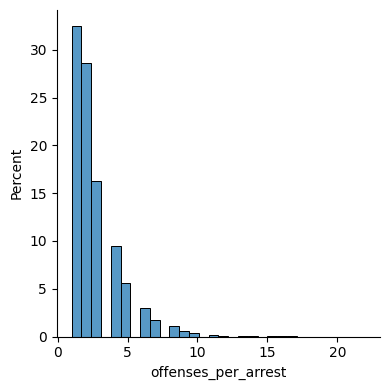

In [ ]:
sns.displot(
    df, x='offenses_per_arrest', stat='percent', kind='hist', bins=30, height=4)

plt.show()

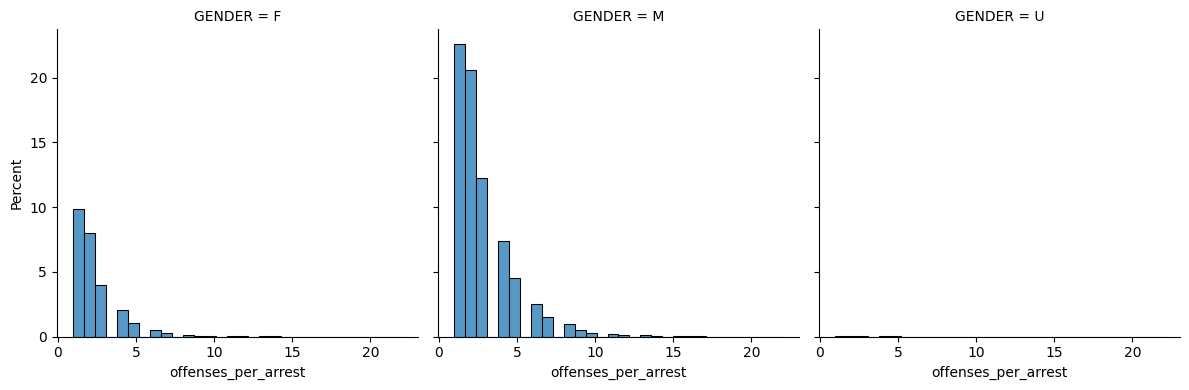

In [ ]:
sns.displot(
    df, x='offenses_per_arrest', col='GENDER', stat='percent', kind='hist', bins=30, height=4,
    facet_kws={'sharex':False, 'sharey':True})

plt.show()

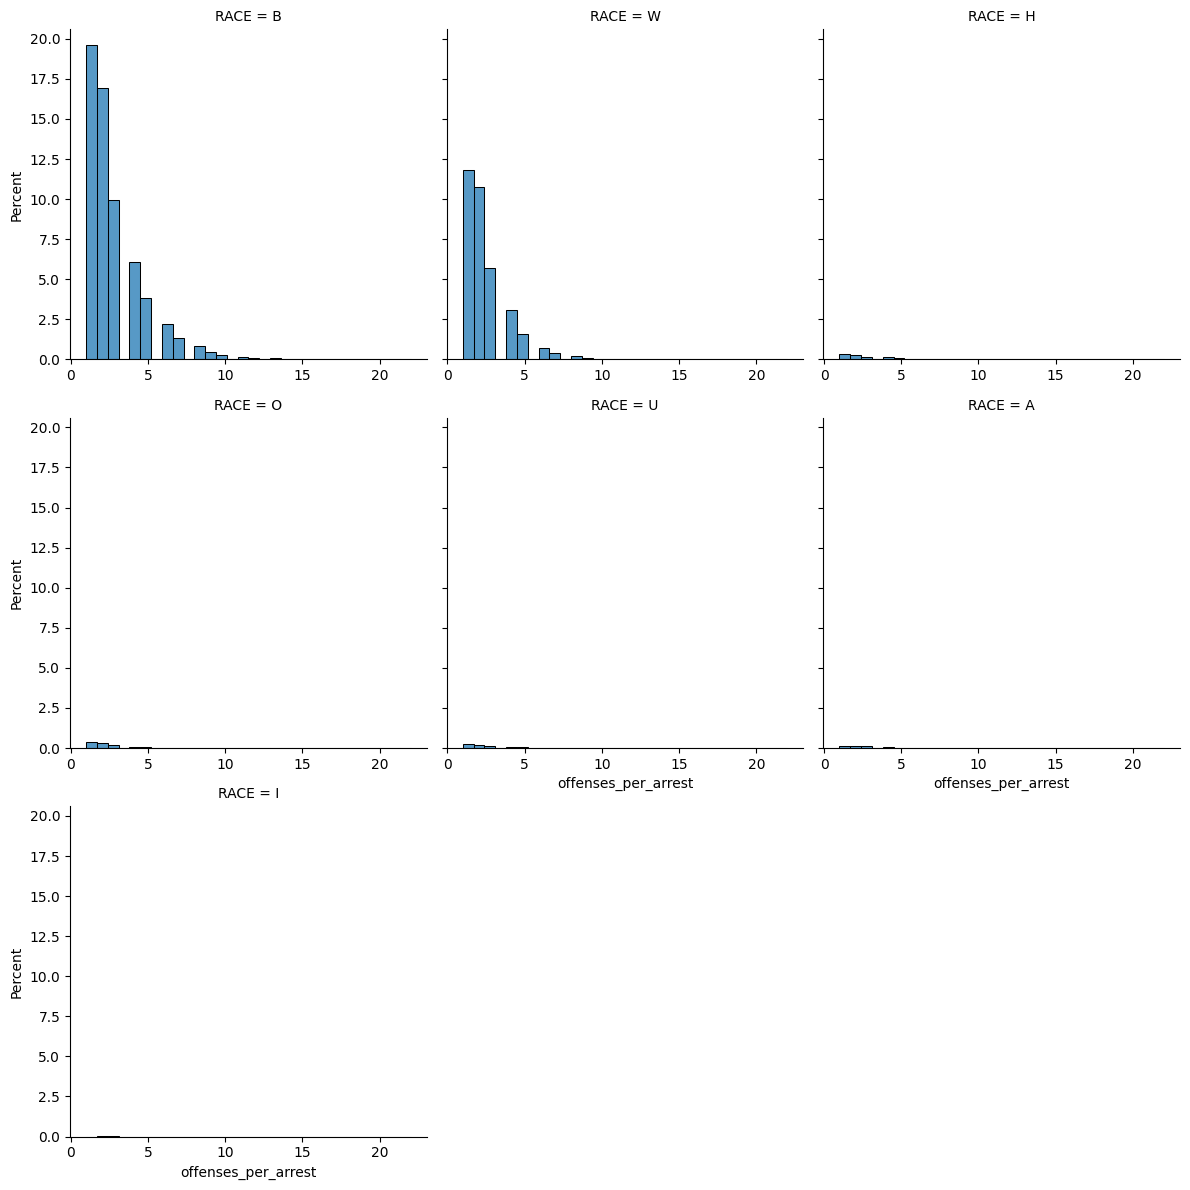

In [ ]:
sns.displot(
    df, x='offenses_per_arrest', col='RACE', col_wrap=3, stat='percent', kind='hist', bins=30, height=4,
    facet_kws={'sharex':False, 'sharey':True})

plt.show()

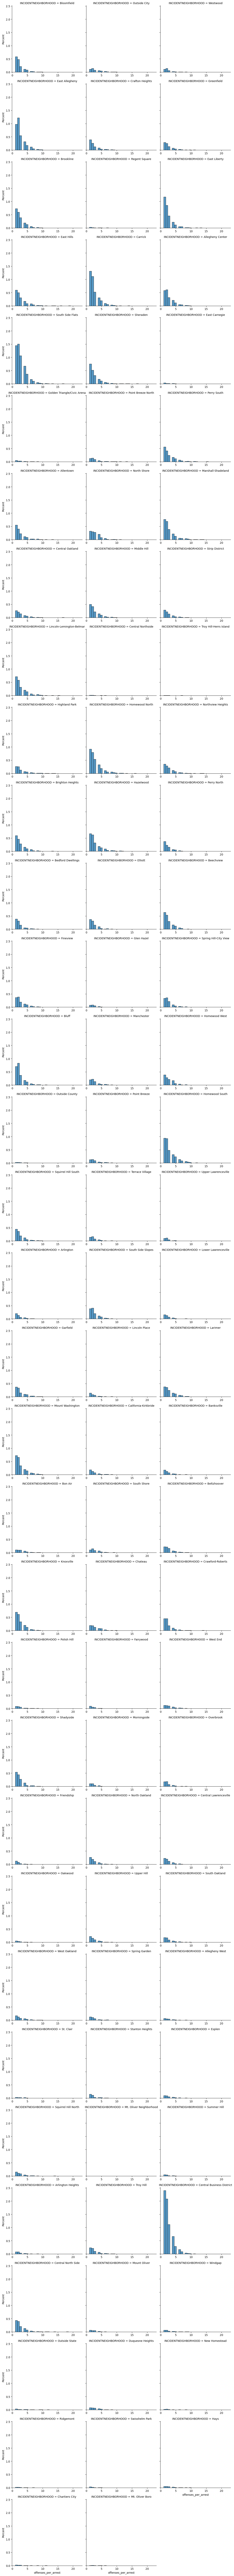

In [ ]:
sns.displot(
    df, x='offenses_per_arrest', col='INCIDENTNEIGHBORHOOD', col_wrap=3, stat='percent', kind='hist', bins=30, height=4,
    facet_kws={'sharex':False, 'sharey':True})

plt.show()

In [ ]:
df['offenses_per_arrest'].mean()

2.600709727531641

### Summarize (aggregate) arrests by neighborhood

In [ ]:
offense_nabe_avg = df.groupby(['INCIDENTNEIGHBORHOOD']).aggregate(offenses_per_arrest_avg = ('offenses_per_arrest', 'mean'),
                                                                  offenses_per_arrest_min = ('offenses_per_arrest', 'min'),
                                                                  offenses_per_arrest_max = ('offenses_per_arrest', 'max')).round(2)

In [ ]:
offense_nabe_avg

,offenses_per_arrest_avg,offenses_per_arrest_min,offenses_per_arrest_max
INCIDENTNEIGHBORHOOD,,,
Allegheny Center,2.59,1,13
Allegheny West,2.60,1,8
Allentown,2.52,1,13
Arlington,2.17,1,9
Arlington Heights,2.47,1,12
...,...,...,...
Upper Lawrenceville,2.32,1,10
West End,2.80,1,8
West Oakland,2.74,1,12


In [ ]:
offense_nabe_avg = df.groupby(['INCIDENTNEIGHBORHOOD']).aggregate(offenses_per_arrest_avg = ('offenses_per_arrest', 'mean'),
                                                                  offenses_per_arrest_min = ('offenses_per_arrest', 'min'),
                                                                  offenses_per_arrest_max = ('offenses_per_arrest', 'max')).round(2).reset_index().copy()

In [ ]:
offense_nabe_avg

,INCIDENTNEIGHBORHOOD,offenses_per_arrest_avg,offenses_per_arrest_min,offenses_per_arrest_max
0,Allegheny Center,2.59,1,13
1,Allegheny West,2.60,1,8
2,Allentown,2.52,1,13
3,Arlington,2.17,1,9
4,Arlington Heights,2.47,1,12
...,...,...,...,...
93,Upper Lawrenceville,2.32,1,10
94,West End,2.80,1,8
95,West Oakland,2.74,1,12
96,Westwood,2.28,1,10


In [ ]:
offense_nabe_avg = df.groupby(['INCIDENTNEIGHBORHOOD']).\
            aggregate(offenses_per_arrest_avg = ('offenses_per_arrest', 'mean'),
                      offenses_per_arrest_min = ('offenses_per_arrest', 'min'),
                      offenses_per_arrest_max = ('offenses_per_arrest', 'max')).\
            round(2).\
            reset_index().\
            copy()

In [ ]:
offense_nabe_avg

,INCIDENTNEIGHBORHOOD,offenses_per_arrest_avg,offenses_per_arrest_min,offenses_per_arrest_max
0,Allegheny Center,2.59,1,13
1,Allegheny West,2.60,1,8
2,Allentown,2.52,1,13
3,Arlington,2.17,1,9
4,Arlington Heights,2.47,1,12
...,...,...,...,...
93,Upper Lawrenceville,2.32,1,10
94,West End,2.80,1,8
95,West Oakland,2.74,1,12
96,Westwood,2.28,1,10


### Separate offenses and restructure the data

In [ ]:
df_3 = df.loc[df['offenses_per_arrest']==3].copy()

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10685 entries, 9 to 65654
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    10685 non-null  int64         
 1   PK                     10685 non-null  int64         
 2   CCR                    10685 non-null  int64         
 3   AGE                    10585 non-null  Int64         
 4   GENDER                 10685 non-null  object        
 5   RACE                   10685 non-null  object        
 6   ARRESTTIME             10685 non-null  datetime64[ns]
 7   ARRESTLOCATION         10685 non-null  object        
 8   OFFENSES               10685 non-null  object        
 9   INCIDENTLOCATION       10685 non-null  object        
 10  INCIDENTNEIGHBORHOOD   10316 non-null  object        
 11  INCIDENTZONE           10665 non-null  object        
 12  INCIDENTTRACT          10319 non-null  float64       
 13  C

In [ ]:
df_3.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,list_of_offenses,offenses_per_arrest
9,10,1974647,16138646,14,M,B,2016-08-23 13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN,"[3127 Indecent Exposure. , 3123(a)(6) IDSI wi...",3
16,17,1975138,16160913,22,F,W,2016-08-27 02:04:00,"Middle ST & Suismon ST Pittsburgh, PA 15212",5505 Public Drunkenness / 13(a)(32) Parapherna...,"Middle ST & Suismon ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-79.999646,40.455364,"[5505 Public Drunkenness , 13(a)(32) Parapher...",3
19,20,1975199,16150776,22,M,B,2016-08-12 20:15:00,"3200 Block Faronia ST Pittsburgh, PA 15204",13(a)(16) Possession of Controlled Substance /...,"3200 Block Faronia ST Pittsburgh, PA 15204",Sheraden,6,2022.0,2.0,5.0,-80.066357,40.451602,[13(a)(16) Possession of Controlled Substance ...,3
22,23,1975395,16162377,26,F,B,2016-08-29 11:20:00,"600 Block Smithfield ST Pittsburgh, PA 15222",3929 Retail Theft. / 13(a)(16) Possession of C...,"600 Block Smithfield ST Pittsburgh, PA 15222",Golden Triangle/Civic Arena,2,201.0,6.0,6.0,-79.997406,40.441525,"[3929 Retail Theft. , 13(a)(16) Possession of...",3
29,30,1975436,16089206,35,M,W,2016-07-25 08:55:00,"900 Block 2ND AV Pittsburgh, PA 15219",2701 Simple Assault. / 2707 Propulsion of Miss...,"Washington PL & 5th AV Pittsburgh, PA 15219",Golden Triangle/Civic Arena,2,201.0,6.0,6.0,-79.990847,40.438802,"[2701 Simple Assault. , 2707 Propulsion of Mi...",3


In [ ]:
df_3[['offense1','offense2','offense3']] = pd.DataFrame(df_3.list_of_offenses.tolist(), index= df_3.index)

In [ ]:
df_3.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,...,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,list_of_offenses,offenses_per_arrest,offense1,offense2,offense3
9,10,1974647,16138646,14,M,B,2016-08-23 13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,...,NaN,NaN,NaN,NaN,NaN,"[3127 Indecent Exposure. , 3123(a)(6) IDSI wi...",3,3127 Indecent Exposure.,3123(a)(6) IDSI with person less than 13 year...,3126(a)(7) Indecent assault of person under 13
16,17,1975138,16160913,22,F,W,2016-08-27 02:04:00,"Middle ST & Suismon ST Pittsburgh, PA 15212",5505 Public Drunkenness / 13(a)(32) Parapherna...,"Middle ST & Suismon ST Pittsburgh, PA 15212",...,2304.0,1.0,1.0,-79.999646,40.455364,"[5505 Public Drunkenness , 13(a)(32) Parapher...",3,5505 Public Drunkenness,13(a)(32) Paraphernalia - Use or Possession,13(a)(31) Marijuana: Possession Small Amount
19,20,1975199,16150776,22,M,B,2016-08-12 20:15:00,"3200 Block Faronia ST Pittsburgh, PA 15204",13(a)(16) Possession of Controlled Substance /...,"3200 Block Faronia ST Pittsburgh, PA 15204",...,2022.0,2.0,5.0,-80.066357,40.451602,[13(a)(16) Possession of Controlled Substance ...,3,13(a)(16) Possession of Controlled Substance,13(a)(30) Possession w,Intent to Del. Controlled Substance
22,23,1975395,16162377,26,F,B,2016-08-29 11:20:00,"600 Block Smithfield ST Pittsburgh, PA 15222",3929 Retail Theft. / 13(a)(16) Possession of C...,"600 Block Smithfield ST Pittsburgh, PA 15222",...,201.0,6.0,6.0,-79.997406,40.441525,"[3929 Retail Theft. , 13(a)(16) Possession of...",3,3929 Retail Theft.,13(a)(16) Possession of Controlled Substance,13(a)(32) Paraphernalia - Use or Possession
29,30,1975436,16089206,35,M,W,2016-07-25 08:55:00,"900 Block 2ND AV Pittsburgh, PA 15219",2701 Simple Assault. / 2707 Propulsion of Miss...,"Washington PL & 5th AV Pittsburgh, PA 15219",...,201.0,6.0,6.0,-79.990847,40.438802,"[2701 Simple Assault. , 2707 Propulsion of Mi...",3,2701 Simple Assault.,2707 Propulsion of Missiles,3304 Criminal Mischief.


In [ ]:
df_3.columns.to_list()

['_id',
 'PK',
 'CCR',
 'AGE',
 'GENDER',
 'RACE',
 'ARRESTTIME',
 'ARRESTLOCATION',
 'OFFENSES',
 'INCIDENTLOCATION',
 'INCIDENTNEIGHBORHOOD',
 'INCIDENTZONE',
 'INCIDENTTRACT',
 'COUNCIL_DISTRICT',
 'PUBLIC_WORKS_DIVISION',
 'X',
 'Y',
 'list_of_offenses',
 'offenses_per_arrest',
 'offense1',
 'offense2',
 'offense3']

In [ ]:
lf_3 = df_3.melt(id_vars=['_id',
 'PK',
 'CCR',
 'AGE',
 'GENDER',
 'RACE',
 'ARRESTTIME',
 'ARRESTLOCATION',
 'INCIDENTLOCATION',
 'INCIDENTNEIGHBORHOOD',
 'INCIDENTZONE',
 'INCIDENTTRACT',
 'COUNCIL_DISTRICT',
 'PUBLIC_WORKS_DIVISION',
 'X',
 'Y'], value_vars=['offense1',
 'offense2',
 'offense3']).\
      sort_values('PK').\
      copy()

In [ ]:
lf_3.head(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,variable,value
10752,485,1974435,16140307,44,M,B,2016-08-08 10:20:00,"5700 Block Baum BL Pittsburgh, PA 15206","SIXTH PENN GARAGE Pittsburgh, PA 15219",Golden Triangle/Civic Arena,2,201.0,NaN,NaN,NaN,NaN,offense2,3304 Criminal Mischief.
67,485,1974435,16140307,44,M,B,2016-08-08 10:20:00,"5700 Block Baum BL Pittsburgh, PA 15206","SIXTH PENN GARAGE Pittsburgh, PA 15219",Golden Triangle/Civic Arena,2,201.0,NaN,NaN,NaN,NaN,offense1,907 Possessing Instruments of Crime.
21437,485,1974435,16140307,44,M,B,2016-08-08 10:20:00,"5700 Block Baum BL Pittsburgh, PA 15206","SIXTH PENN GARAGE Pittsburgh, PA 15219",Golden Triangle/Civic Arena,2,201.0,NaN,NaN,NaN,NaN,offense3,3934 Theft from Vehicle
21395,173,1974444,16143009,47,M,B,2016-08-01 21:55:00,"1500 Block Westmoreland ST Pittsburgh, PA 15206","1500 Block Westmoreland ST Pittsburgh, PA 15206",Lincoln-Lemington-Belmar,5,1202.0,9.0,2.0,-79.894590,40.468247,offense3,3802(b) DUI - High Rate of Alchol - BAC >=.10...
10710,173,1974444,16143009,47,M,B,2016-08-01 21:55:00,"1500 Block Westmoreland ST Pittsburgh, PA 15206","1500 Block Westmoreland ST Pittsburgh, PA 15206",Lincoln-Lemington-Belmar,5,1202.0,9.0,2.0,-79.894590,40.468247,offense2,3802(a)(1) DUI - General Impairment
25,173,1974444,16143009,47,M,B,2016-08-01 21:55:00,"1500 Block Westmoreland ST Pittsburgh, PA 15206","1500 Block Westmoreland ST Pittsburgh, PA 15206",Lincoln-Lemington-Belmar,5,1202.0,9.0,2.0,-79.894590,40.468247,offense1,1543 Driving While Operating Privilege is Susp...
21422,396,1974450,16081877,21,M,B,2016-08-21 08:30:00,"900 Block 2ND AV Pittsburgh, PA 15219","600 Block Toboggan ST Pittsburgh, PA 15212",Fineview,1,2509.0,1.0,1.0,-80.002061,40.464603,offense3,2701(a)(3) Simple Assault - Attempts by Physi...
52,396,1974450,16081877,21,M,B,2016-08-21 08:30:00,"900 Block 2ND AV Pittsburgh, PA 15219","600 Block Toboggan ST Pittsburgh, PA 15212",Fineview,1,2509.0,1.0,1.0,-80.002061,40.464603,offense1,2705 Recklessy Endangering Another Person.
10737,396,1974450,16081877,21,M,B,2016-08-21 08:30:00,"900 Block 2ND AV Pittsburgh, PA 15219","600 Block Toboggan ST Pittsburgh, PA 15212",Fineview,1,2509.0,1.0,1.0,-80.002061,40.464603,offense2,4304(a)(1) Endangering Welfare of Children.
10730,330,1974458,16142558,45,M,B,2016-08-01 10:06:00,"2600 Block Forbes AV Pittsburgh, PA 15213","2600 Block Forbes AV Pittsburgh, PA 15213",South Oakland,4,409.0,6.0,3.0,-79.967636,40.435670,offense2,9501 Bench Warrant


In [ ]:
lf_3 = df_3.melt(id_vars=['_id','PK','INCIDENTNEIGHBORHOOD'], value_vars=['offense1','offense2','offense3']).\
      sort_values('PK').\
      rename(columns={'value':'offense'}).\
      drop(columns=['variable']).\
      copy()

In [ ]:
lf_3.head(10)

,_id,PK,INCIDENTNEIGHBORHOOD,offense
10752,485,1974435,Golden Triangle/Civic Arena,3304 Criminal Mischief.
67,485,1974435,Golden Triangle/Civic Arena,907 Possessing Instruments of Crime.
21437,485,1974435,Golden Triangle/Civic Arena,3934 Theft from Vehicle
21395,173,1974444,Lincoln-Lemington-Belmar,3802(b) DUI - High Rate of Alchol - BAC >=.10...
10710,173,1974444,Lincoln-Lemington-Belmar,3802(a)(1) DUI - General Impairment
25,173,1974444,Lincoln-Lemington-Belmar,1543 Driving While Operating Privilege is Susp...
21422,396,1974450,Fineview,2701(a)(3) Simple Assault - Attempts by Physi...
52,396,1974450,Fineview,2705 Recklessy Endangering Another Person.
10737,396,1974450,Fineview,4304(a)(1) Endangering Welfare of Children.
10730,330,1974458,South Oakland,9501 Bench Warrant


In [ ]:
lf_3['offense'].nunique()

828

In [ ]:
lf_3['offense'].unique().tolist()[0:10]

[' 3304 Criminal Mischief. ',
 '907 Possessing Instruments of Crime. ',
 ' 3934 Theft from Vehicle',
 ' 3802(b) DUI - High Rate of Alchol - BAC >=.10% <.16%',
 ' 3802(a)(1) DUI - General Impairment ',
 '1543 Driving While Operating Privilege is Suspended or Revoked. ',
 ' 2701(a)(3) Simple Assault - Attempts by Physical Menace ',
 '2705 Recklessy Endangering Another Person. ',
 ' 4304(a)(1) Endangering Welfare of Children. ',
 ' 9501 Bench Warrant ']

In [ ]:
by_offense_by_nabe_summ = lf_3.groupby(['offense','INCIDENTNEIGHBORHOOD']).\
            aggregate(record_count = ('PK', 'count')).\
            reset_index().\
            copy()

In [ ]:
by_offense_by_nabe_summ

,offense,INCIDENTNEIGHBORHOOD,record_count
0,105.6.31 Open burning,Upper Lawrenceville,2
1,"13(a)(1) Manuf., Deliv., Poss. of Adult., Mis...",Homewood West,1
2,13(a)(12) Obtaining Cont. Subst. by Fraudulen...,Carrick,1
3,13(a)(12) Obtaining Cont. Subst. by Fraudulen...,East Allegheny,1
4,13(a)(12) Obtaining Cont. Subst. by Fraudulen...,Squirrel Hill South,1
...,...,...,...
10146,"Water, Bodily Injury",Bedford Dwellings,2
10147,"Water, Bodily Injury",Homewood North,2
10148,"Water, Bodily Injury",Shadyside,1
10149,"Water, Bodily Injury",Upper Lawrenceville,1


#### Create a function to process offenses for the entire dataset

In [ ]:
number_of_offenses = 12

In [ ]:
list_of_vars = []
for i in range(1, 13):
  list_of_vars.append('offense' + str(i))

In [ ]:
list_of_vars

['offense1',
 'offense2',
 'offense3',
 'offense4',
 'offense5',
 'offense6',
 'offense7',
 'offense8',
 'offense9',
 'offense10',
 'offense11',
 'offense12']

In [ ]:
def expand_list_and_melt(df, var_to_expand, list_len, list_of_id_vars):

  list_of_new_vars = []
  for i in range(1, list_len+1):
    list_of_new_vars.append('var' + str(i))

  df[list_of_new_vars] = pd.DataFrame(df[var_to_expand].tolist(), index= df.index)

  lf = df.melt(id_vars=list_of_id_vars, value_vars=list_of_new_vars).\
      copy()

  return lf

In [ ]:
df.columns.to_list()

['_id',
 'PK',
 'CCR',
 'AGE',
 'GENDER',
 'RACE',
 'ARRESTTIME',
 'ARRESTLOCATION',
 'OFFENSES',
 'INCIDENTLOCATION',
 'INCIDENTNEIGHBORHOOD',
 'INCIDENTZONE',
 'INCIDENTTRACT',
 'COUNCIL_DISTRICT',
 'PUBLIC_WORKS_DIVISION',
 'X',
 'Y',
 'list_of_offenses',
 'offenses_per_arrest']

In [ ]:
df_id_vars = ['_id',
 'PK',
 'INCIDENTNEIGHBORHOOD']

In [ ]:
df['offenses_per_arrest'].unique().tolist()

[1, 2, 4, 3, 7, 6, 5, 8, 9, 13, 10, 12, 14, 11, 15, 17, 16, 18, 19, 22]

In [ ]:
list_of_list_len = df['offenses_per_arrest'].unique().tolist()

In [ ]:
lf_all = pd.DataFrame()
for i in list_of_list_len:
  df_in = df.loc[df['offenses_per_arrest']==i].copy()
  lf_all = pd.concat([lf_all, expand_list_and_melt(df_in, 'list_of_offenses', i, df_id_vars)], axis=0).copy()

In [ ]:
lf_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170760 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   _id                   170760 non-null  int64 
 1   PK                    170760 non-null  int64 
 2   INCIDENTNEIGHBORHOOD  162555 non-null  object
 3   variable              170760 non-null  object
 4   value                 170760 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.8+ MB


In [ ]:
df['offenses_per_arrest'].sum()

170760

In [ ]:
lf = lf_all.drop(columns=['variable']).rename(columns={'value':'offense'}).copy()

In [ ]:
lf.head()

,_id,PK,INCIDENTNEIGHBORHOOD,offense
0,1,1975272,Bloomfield,3929 Retail Theft.
1,2,1974456,Outside City,13(a)(16) Possession of Controlled Substance
2,3,1974466,Westwood,3929 Retail Theft.
3,6,1974556,Greenfield,3929 Retail Theft.
4,7,1974628,Brookline,2701 Simple Assault.


In [ ]:
lf['INCIDENTNEIGHBORHOOD'] = [np.nan if str(x)=='nan' else x.strip() for x in lf['INCIDENTNEIGHBORHOOD']]

In [ ]:
lf['offense'] = [x.strip() for x in lf['offense']]

In [ ]:
by_offense_by_nabe_all_summ = lf.groupby(['offense','INCIDENTNEIGHBORHOOD']).\
            aggregate(record_count = ('PK', 'count')).\
            reset_index().\
            copy()

In [ ]:
by_offense_by_nabe_all_summ

,offense,INCIDENTNEIGHBORHOOD,record_count
0,028 Curfew Violation,Homewood South,1
1,100 Fugitive,Allegheny Center,1
2,100 Fugitive,Allentown,1
3,100 Fugitive,Bluff,1
4,100 Fugitive,Brookline,2
...,...,...,...
13646,o immediately cleaning and disposing of the ma...,South Side Flats,1
13647,ticket,Chateau,1
13648,ticket,Strip District,1
13649,vehicle or to Purchase an item,Chateau,1


In [ ]:
by_offense_by_nabe_all_summ.loc[by_offense_by_nabe_all_summ['offense']=='3736 Reckless Driving']

,offense,INCIDENTNEIGHBORHOOD,record_count
6145,3736 Reckless Driving,Allegheny Center,20
6146,3736 Reckless Driving,Allegheny West,7
6147,3736 Reckless Driving,Allentown,15
6148,3736 Reckless Driving,Arlington,6
6149,3736 Reckless Driving,Arlington Heights,2
...,...,...,...
6232,3736 Reckless Driving,Upper Lawrenceville,1
6233,3736 Reckless Driving,West End,13
6234,3736 Reckless Driving,West Oakland,13
6235,3736 Reckless Driving,Westwood,6


In [ ]:
by_offense_by_nabe_all_summ.loc[(by_offense_by_nabe_all_summ['INCIDENTNEIGHBORHOOD']=='South Side Flats') & (by_offense_by_nabe_all_summ['offense']=='3736 Reckless Driving')]

,offense,INCIDENTNEIGHBORHOOD,record_count
6218,3736 Reckless Driving,South Side Flats,116


In [ ]:
by_offense_by_nabe_all_summ['record_count'].max()

617

In [ ]:
by_offense_by_nabe_all_summ.loc[(by_offense_by_nabe_all_summ['record_count']==617)]

,offense,INCIDENTNEIGHBORHOOD,record_count
10563,5505 Public Drunkenness,South Side Flats,617
